# <center>How much better can the 2019 NBA Draft class get?</center>
<center>Ved Pujari<center>
<p align="center">
  <img width="460" height="325" src=Draft.jpg>
</p>

<p><b>Introduction</b></p>
As an avid watcher of the NBA, I was suprised to see how much talent has come out of the rookies this season. Along with me, other fans, and NBA commentators, we all had the same mindset, that these rookies are some of the best performing rookies seen to step foot on NBA courts in a while. Some recources include "UNDISPUTED" on youtube, as well as https://clutchpoints.com/is-the-2019-nba-draft-class-the-best-from-the-last-decade/. The question I want to know is how much potential these rookies will have if we take their stats from this year and apply a "Hall of Fame" slope onto it. The Hall of Fame is recognized in every sport, and is described as an institution that honors the best individuals from a particular activity. In this case, it will be basketball. I plan to do this by gathering data from the Hall of Famers that played from the 1980's onward for several years. This will incude the four most essential stats a player can have: Points per game, Shooting percentage, Rebounds, and Assists. I will be excluding anything to do with Championships, such as Championship Rings and Finals MVP's as we will be predicting this young players career growth, not if his team wins a championship. Championships will vary depending on teams hes on, injuries, support players, etc. After I gather this data, I will seperate the data by position. With this data, for each position, I will create a linear regression model. I then will plot each of the top 15 picks from the 2019 Draft class to see how they compare against Hall of Famers statistics and see their potential.

# <center>How much better can the 2019 NBA Draft class get?</center>
<center>Ved Pujari<center>
<p align="center">
  <img width="460" height="325" src=Draft.jpg>
</p>

<p><b>Introduction</b></p>
As an avid watcher of the NBA, I was suprised to see how much talent has come out of the rookies this season. Along with me, other fans, and NBA commentators, we all had the same mindset, that these rookies are some of the best performing rookies seen to step foot on NBA courts in a while. Some recources include "UNDISPUTED" on youtube, as well as https://clutchpoints.com/is-the-2019-nba-draft-class-the-best-from-the-last-decade/. The question I want to know is how much potential these rookies will have if we take their stats from this year and apply a "Hall of Fame" slope onto it. The Hall of Fame is recognized in every sport, and is described as an institution that honors the best individuals from a particular activity. In this case, it will be basketball. I plan to do this by gathering data from the Hall of Famers that played from the 1980's onward for several years. This will incude the four most essential stats a player can have: Points per game, Shooting percentage, Rebounds, and Assists. I will be excluding anything to do with Championships, such as Championship Rings and Finals MVP's as we will be predicting this young players career growth, not if his team wins a championship. Championships will vary depending on teams hes on, injuries, support players, etc. After I gather this data, I will seperate the data by position. With this data, for each position, I will create a linear regression model. I then will plot each of the top 15 picks from the 2019 Draft class to see how they compare against Hall of Famers statistics and see their potential.

<p><b>Data Collection</b></p>
In this project, we collect our data from several different websites. In data science, we learned that data can be collected in many ways, such as csv's and htmls. In my find, I will be using htmls. First, we need to import all possible programs that we will be using

In [25]:
import requests
import numpy
from bs4 import BeautifulSoup
import pandas
import re
import seaborn as sns
import matplotlib.pyplot as plot

Now, we have to initialize a head to collect all our data from. This was found with a quick google search, as it is IP based. We first have to collect all the names of NBA Hall of famers. In the basketball Hall of fame, in addition to NBA players, there are WNBA players, International players, and Coaches. This website included only NBA players, so the data collection was a bit easier due to this website.

In [26]:
#Uses code from Project 1- Solar Flare to extract data, as the data I am aollecting is from an html
head = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}
r=requests.get("https://en.hispanosnba.com/players/hall-of-fame/index",headers=head)
text=BeautifulSoup(r.content,'html')
text=pandas.read_html(text.find('table').prettify())
hof_data=text[0]

Here, I initialize 5 arrays for each position in the NBA: Point Guard, Shooting Guard Small Forward, and Center. There are 135 NBA players in the Hall of fame currently, so my for loop is of range 135. I then have a filter to only gather data of players who played in the 1980s. I decided to filter by 1980s, because Michael Jordan, objectively the greatest player of all time played in this era, and wanted to base my statistics off the peak of NBA, which is from the 1980s-Present. I then filtered again by position and added the names of the the Hall of Famers to each positional array, respectively.

In [27]:
hof_PG= []
hof_SG= []
hof_SF= []
hof_PF= []
hof_C= []
#Adds all 1980 Players to respective position arrays.
for x in range(135):
    if "198" in hof_data["In the NBA"]["Years"][x]:
        if ("PG" in hof_data["Pos."]["Pos."][x]):
            hof_PG.append(hof_data["Name"]["Name"][x])
        if ("SG" in hof_data["Pos."]["Pos."][x]):
            hof_SG.append(hof_data["Name"]["Name"][x])
        if ("SF" in hof_data["Pos."]["Pos."][x]):
            hof_SF.append(hof_data["Name"]["Name"][x])
        if ("PF" in hof_data["Pos."]["Pos."][x]):
            hof_PF.append(hof_data["Name"]["Name"][x])
        if ("C" in hof_data["Pos."]["Pos."][x]):
            hof_C.append(hof_data["Name"]["Name"][x])

#Edge Case relating to the getUrl method. The website I collected the names from uses a different name for Tiny Archibald
hof_PG[0]="Tiny Archibald"

Now that we have the players names we want for each position, we need to gather the statistics for each player. The way I decided to tackle this is by using a webiste called basketball-reference.com. Each player has their own unique website for stats, so I created an array of Urls for each player. Essentially, instead of a list of names, the below method creates a list of urls. 

In [28]:
#Creates Url with pattern that was easily recognizable from basketball-refernce.com
def getUrl(playerType):
    urls=[]
    for x in range(len(playerType)):
        if(playerType[x] == "K.C. Jones"):
            url="https://www.basketball-reference.com/players/j/joneskc01.html"
        elif(playerType[x] == "Jo Jo White"):
            url="https://www.basketball-reference.com/players/w/whitejo01.html"
        elif(playerType[x] == "Jaxson Hayes"):
            url="https://www.basketball-reference.com/players/h/hayesja02.html"
        elif(playerType[x] == "Cameron Johnson"):
            url="https://www.basketball-reference.com/players/j/johnsca02.html"
        else:
            name=playerType[x].split(" ")
            big1=name[1][0:5].lower()
            big2=name[0][0:2].lower()
            small=name[1][0].lower()
            url="https://www.basketball-reference.com/players/"+small+"/"+big1+big2+"01.html"
        urls.append(url)
    return urls

Now that we have a way to get the links for each of these players, we now have to find a way to collect the data for each of these players. The getData mathod does just that. The method below collects data based on the link you put into the parameter. This will come in handy in the future.

In [29]:
#Gets data depending on what link is sent in. This is useful for getting the stats of all the players, as the links are all different.
def getData(link):
    r=requests.get(link,headers=head)
    text=BeautifulSoup(r.content,'html')
    text=pandas.read_html(text.find('table').prettify())
    data=text[0]
    return data


Going back to what I said earlier about collecting the data, here is a method I created that collects data based on what player type is given. The below method essentially creates five 2D arrays that has 15 slots each. Example for PG: [ [Year 0, Year 1, Year 2, ... Year 15] , [Year 0, Year 1, Year 2, ... Year 15] ... for all the point guards ]

In [30]:
stats=["PTS","FG%","TRB","AST","TOV"]

#Gets all the stats for 15 years of playing, for points, shooting percent, rebounds, and assists. Then al these numbers get added up and placed
#into an array.
def getStats(playerType):
    All_Player= [[]] * len(playerType)
    for a in range(len(playerType)):
        player=[]
        player_data=getData(getUrl(playerType)[a])
        #Fifteen years
        for x in range(15):
            try:
                points=float(player_data[stats[0]][x])
                shooting=float(player_data[stats[1]][x])
                rebounds=float(player_data[stats[2]][x])
                assists=float(player_data[stats[3]][x])
                data_point=(points+shooting+rebounds+assists)
                player.append(points)
            except:
                continue
        All_Player[a]=player
    return All_Player

#These variables make it easier to get the stats for each hof position.
PGstats=getStats(hof_PG)
SGstats=getStats(hof_SG)
SFstats=getStats(hof_SF)
PFstats=getStats(hof_PF)
Cstats=getStats(hof_C)

<p><b>Data Visualization</b></p>
Now that we have all the data for Hall of Famers we need to work with, we need to start graphing this data to have a better understanding. 

I created a graph method that creates a violin plot for the type of player inputted. Because of the way I formatted my data points previously, I had to do a bit of editing to have correct syntax for seaborn. Seaborn is something that allows me to easily plot violin and box plots while given a x list and y list. For more information on seaborn, look here: https://seaborn.pydata.org/. Essentially, I had to combine all of my data into a one dimensional array. Example: if I originally had  [ Year 0, Year 1, Year 2, ... Year 5 , Year 0, Year 1, Year 2, ... Year 5 ... for all the point guards ] I had to convert it to [0,0,0, ... 5 times, 1,1,1,1, 15 times, 2,2,2,2, 5 times] and [Year 0 statistic,Year 0 statistic,Year 0 statistic, ... 5 times, Year 1 statistic, Year 1 statistic, Year 1 statistic, Year 1 statistic, 5 times,  Year 2 statistic,Year 2 statistic,Year 2 statistic,Year 2 statistic, 5 times]. The 5 times represents the 5 years I collected data for, and the 0 -2 and so on represents how many Hall of Famers I took data for. The reason I condensed it to only five years was to get the players rise in their careers, rather than after their peak/plateau. Although this looks confusing, with a simple flatten() method I was able to convert my 2d array into a 1d array. After this, I also added some x and y labels depending on what player type was inputted.

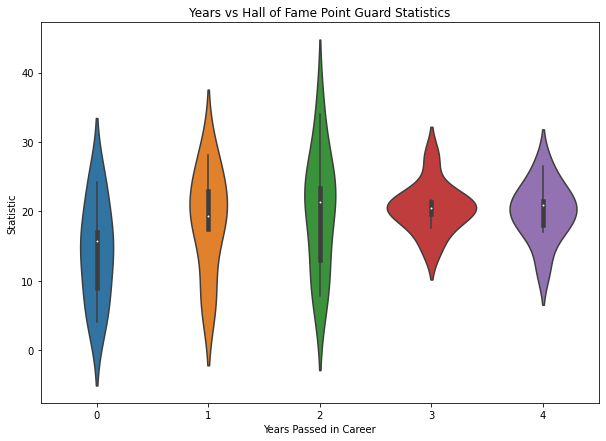

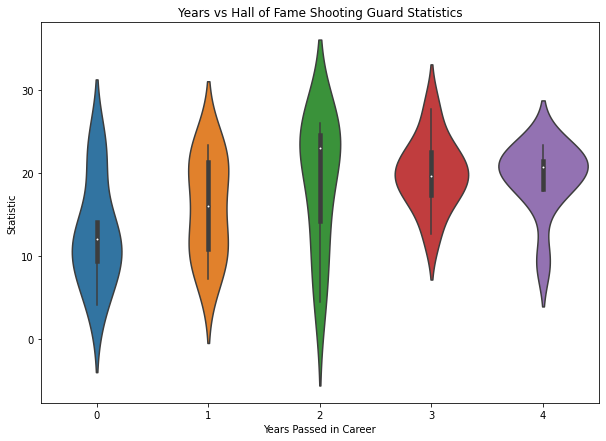

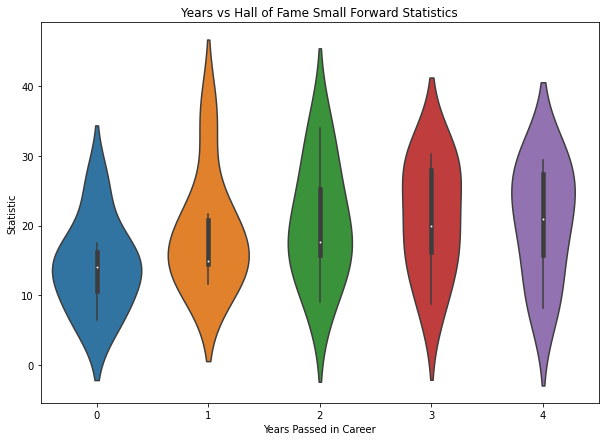

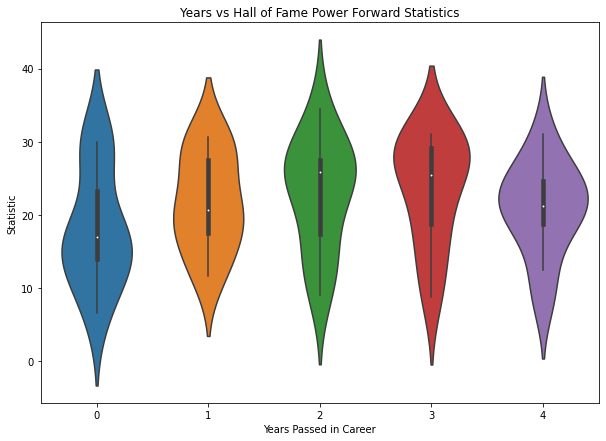

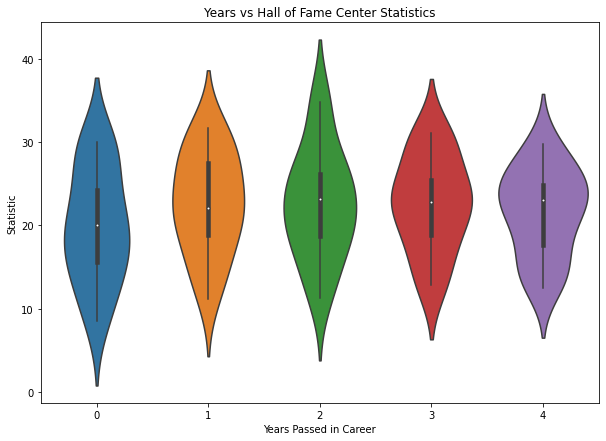

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#The graph method creates a violin plot for the inputted player position
def graph(playerType):
    finalxlist=[]
    finalylist=[]
    #Initialized size of graph
    plt.figure(figsize=(10,7))
    #We will only be using five years
    for x in range(5):
        xlist=[]
        ylist=[]
        for j in range(len(playerType)):
            if(playerType==hof_PG):
                y=PGstats[j][x]
            elif(playerType==hof_SG):
                y=SGstats[j][x]
            elif(playerType==hof_SF):
                y=SFstats[j][x]
            elif(playerType==hof_PF):
                y=PFstats[j][x]
            else:
                y=Cstats[j][x]
            xlist.append(x)
            ylist.append(y)
        finalxlist.append(xlist)
        finalylist.append(ylist)
        
        #Creates Graph Labels
        if(playerType==hof_PG):
                plt.title("Years vs Hall of Fame Point Guard Statistics")
        elif(playerType==hof_SG):
            plt.title("Years vs Hall of Fame Shooting Guard Statistics")
        elif(playerType==hof_SF):
            plt.title("Years vs Hall of Fame Small Forward Statistics")
        elif(playerType==hof_PF):
            plt.title("Years vs Hall of Fame Power Forward Statistics")
        else:
            plt.title("Years vs Hall of Fame Center Statistics")
        
        plt.xlabel("Years Passed in Career")
        plt.ylabel("Statistic")
    
    #Seaborn only takes in one dimensional arrays
    final_xlist=(np.array(finalxlist)).flatten()
    final_ylist=(np.array(finalylist)).flatten()

    sns.violinplot(x =final_xlist, y = final_ylist)




graph(hof_PG)
graph(hof_SG)
graph(hof_SF)
graph(hof_PF)
graph(hof_C)



<p><b>Data Violin Plot Analysis</b></p>
From these 5 graphs, we can talk a bit about if the data is normally distributed, or skewed in any way. Data being normally distributed is described as " distribution that is symmetrical on both sides of the mean." In this case, it means that players had around the same stats for the most part. For some positions, this holds true, but for other positions this is inaccurate. For most of the positions, the data seems to be skewed towards lower stats, especially in the early years, with an exception of Centers. This may indicate that as the years went by, the game changed for the better and players started to score more. This may be a change of speed in the prime years of NBA, with many talented players entering the scene, such as Michael Jordan.

<p><b>Rookie Data Collection</b></p>


Now it is time to deal with our original question, on how much potential the 2019 NBA Draft class has. Similar to how I collected the names of the Hall of Famers earlier, I used a website to collect the names of the first round of the 2019 Draft.

In [32]:
#Gets data for a list of the 2019 NBA Draft class
r=requests.get("https://www.basketball-reference.com/draft/NBA_2019.html",headers=head)
text=BeautifulSoup(r.content,'html')
text=pandas.read_html(text.find('table').prettify())
rookie_data=text[0]
rookies=[]
for x in range(30):
    rookies.append(rookie_data["Round 1"]["Player"][x])

url_rookies=getUrl(rookies)
#Two edge cases where there was players with the same last name and first name
url_rookies[7]="https://www.basketball-reference.com/players/h/hayesja02.html"
url_rookies[10]="https://www.basketball-reference.com/players/j/johnsca02.html"

PG_Name=[]
PG_Stat=[]
SG_Name=[]
SG_Stat=[]
SF_Name=[]
SF_Stat=[]
PF_Name=[]
PF_Stat=[]
C_Name=[]
C_Stat=[]
   
    

The below for loop essentially is an iteration of a method I created for calculating and saving the Hall of Fame Player Data. Instead of saving all the data into a 2d array, I created 5 seperate arrays, depending on their position: PG_Stat, SG_Stat, SF_Stat, etc. The reason I did this was because I am only collecting data for one year and the top 15 picks, so the process of creating graphs will be much easier this way. An Example of this for Point Guards : PG_Name=[ Player A, Player B] PG_stat=[15,17]. With this way of organization, I can easily grab the rookies name and statistic.

In [33]:
#Adds the name and (statistic=pts+shooting%+rebounds+assists) to an array to make graphing the linear model for
#rookies easier
for x in range(15):
    statistic=0
    r=requests.get(url_rookies[x],headers=head)
    text=BeautifulSoup(r.content,'html')
    text=pandas.read_html(text.findAll("table")[1].prettify())
    rookie_data=text[0]
    statistic=rookie_data["PTS"][0]+rookie_data["FG%"][0]+rookie_data["TRB"][0]+rookie_data["AST"][0]
    if(rookie_data["Pos"][0]=="PG"):
        PG_Name.append(rookies[x])
        PG_Stat.append(statistic)
    if(rookie_data["Pos"][0]=="SG"):
        SG_Name.append(rookies[x])
        SG_Stat.append(statistic)
    if(rookie_data["Pos"][0]=="SF"):
        SF_Name.append(rookies[x])
        SF_Stat.append(statistic)
    if(rookie_data["Pos"][0]=="PF"):
        PF_Name.append(rookies[x])
        PF_Stat.append(statistic)
    if(rookie_data["Pos"][0]=="C"):
        C_Name.append(rookies[x])
        C_Stat.append(statistic)

In order to compare the 2019 Draft Class to the Hall of Famers, I need to create equations to plot lines against the Hall of Famers Linear Regression. The equation I made was the slope of the Hall of Fame Linear Model plus the rookie statistic (y-intercept) I collected the slopes of the Hall of Famers positions by running a linear regression on them, as shown below

In [34]:
#Creates equations based on the slopes I found while creating linear models for the hall of fame players.
for x in range(len(PG_Name)):
    PG_Stat[x]='1.3*x+'+str(PG_Stat[x])
for x in range(len(SG_Name)):
    SG_Stat[x]='1.7*x+'+str(SG_Stat[x])
for x in range(len(SF_Name)):
    SF_Stat[x]='1.5*x+'+str(SF_Stat[x])
for x in range(len(PF_Name)):
    PF_Stat[x]='0.7*x+'+str(PF_Stat[x])
for x in range(len(C_Name)):
    C_Stat[x]='0.3*x+'+str(C_Stat[x])

<p><b>Linear Regression</b></p>
The last step in this project is to visualize the potential of the rookies. In order to start this off, I imported a few things to help me while graphing linear regression models.  


The graphnew method will be useful when graphing the rookies potential against the Hall of Famers

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

#Method used to graph rookies on same graph as the linear model for hall of famers
def graphnew(formula, x_range, name):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y, label=name)  
    plt.legend()
    


The below graph method is a modified version of a graph method I created previosuly. THhe main difference is that instead of graphing a violin plot, this method plots scatter and linear regression. The reason I had to create an new method was to showcase the two different graphs and what they each show (normal distribution and rookie potential). For mopre information on normal distribution, look here: https://www.mathsisfun.com/data/standard-normal-distribution.html. Additionally,I wanted to have two seperate graphs, one that shows only the Hall of Famers, and one that shows both the Hall of Famers and Rookies

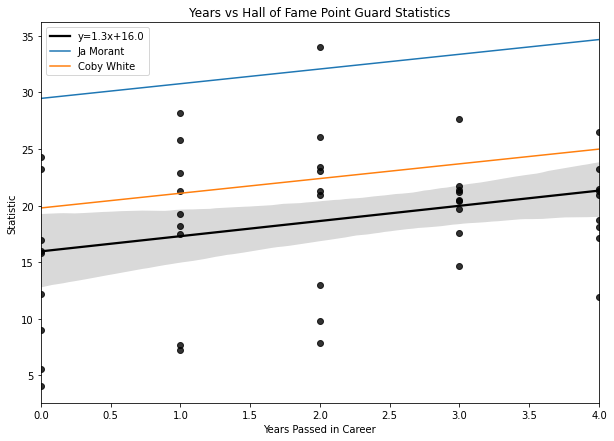

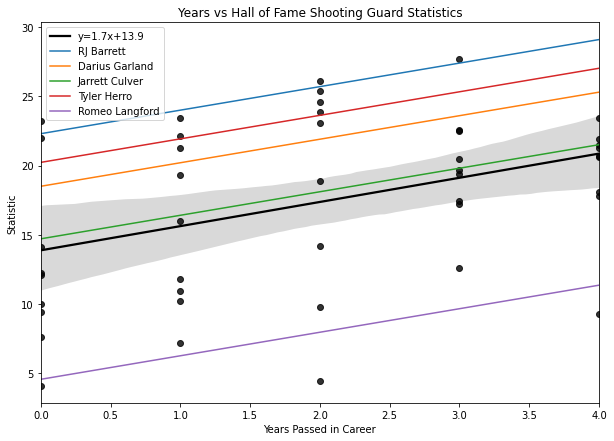

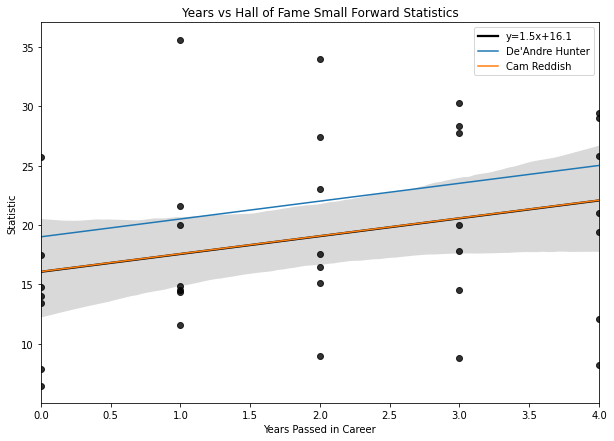

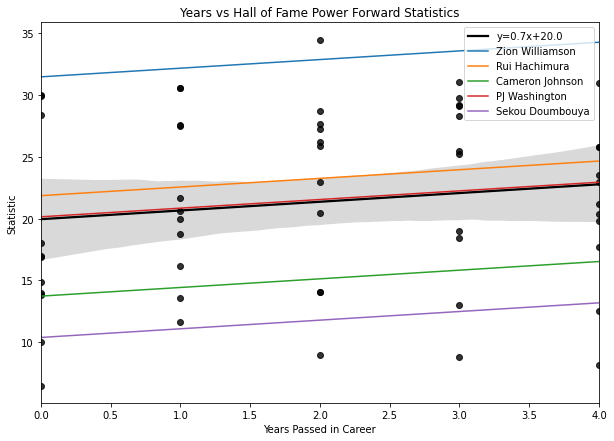

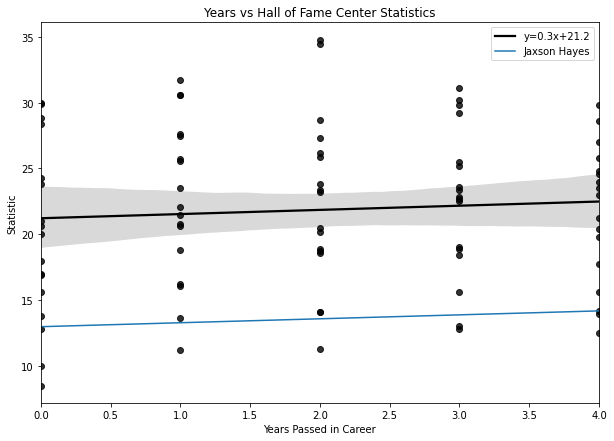

In [36]:
#Graph method is used to graph linear model alongside the rookies from this past NBA season
def graph(playerType):
    finalxlist=[]
    finalylist=[]
    plt.figure(figsize=(10,7))
    for x in range(5):
        xlist=[]
        ylist=[]
        for j in range(len(playerType)):
            if(playerType==hof_PG):
                y=PGstats[j][x]
            elif(playerType==hof_SG):
                y=SGstats[j][x]
            elif(playerType==hof_SF):
                y=SFstats[j][x]
            elif(playerType==hof_PF):
                y=PFstats[j][x]
            else:
                y=Cstats[j][x]
            xlist.append(x)
            ylist.append(y)
        finalxlist.append(xlist)
        finalylist.append(ylist)
            
        if(playerType==hof_PG):
                plt.title("Years vs Hall of Fame Point Guard Statistics")
        elif(playerType==hof_SG):
            plt.title("Years vs Hall of Fame Shooting Guard Statistics")
        elif(playerType==hof_SF):
            plt.title("Years vs Hall of Fame Small Forward Statistics")
        elif(playerType==hof_PF):
            plt.title("Years vs Hall of Fame Power Forward Statistics")
        else:
            plt.title("Years vs Hall of Fame Center Statistics")
        
        plt.xlabel("Years Passed in Career")
        plt.ylabel("Statistic")

    #This is where the linear regression takes place, along with finding what the equation representative will be  
    final_xlist=(np.array(finalxlist)).flatten()
    final_ylist=(np.array(finalylist)).flatten()
    slope, intercept, r_value, p_value, std_err = stats.linregress(final_xlist,final_ylist)

    # use line_kws to set line label for legend
    #sns.violinplot(x =final_xlist, y = final_ylist)
    ax = sns.regplot(x=final_xlist, y=final_ylist, color='black', 
    line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    # plot legend
    ax.legend()
    if(playerType==hof_PG):
        for x in range(len(PG_Name)):
            graphnew(PG_Stat[x], range(0, 5),PG_Name[x])
    elif(playerType==hof_SG):
        for x in range(len(SG_Name)):
            graphnew(SG_Stat[x], range(0, 5),SG_Name[x])
    elif(playerType==hof_SF):
        for x in range(len(SF_Name)):
            graphnew(SF_Stat[x], range(0, 5),SF_Name[x])
    elif(playerType==hof_PF):
        for x in range(len(PF_Name)):
            graphnew(PF_Stat[x], range(0, 5),PF_Name[x])
    elif(playerType==hof_C):
        for x in range(len(C_Name)):
            graphnew(C_Stat[x], range(0, 5),C_Name[x])
    
    plt.show()



graph(hof_PG)
graph(hof_SG)
graph(hof_SF)
graph(hof_PF)
graph(hof_C)

<p><b>Linear Regression Analysis and Conclusion</b></p>

The above five graphs show us how the 2019 Draft Class, also know as this past years rookies compare to Hall of Famers, and how much potential each one of them has. We can easily say that the Shooting Guards of this class were the most talented, and Point Guards were a close second. The Small Forwards and Power Forwards were pretty equal, but the one lonely center from the 2019 draft class unfortunately does not have Hall of Fame potential. The Point Guard with the most potential is Ja Morant, Shooting guard is RJ Barett and Tyler Herro, and the Power Forward with the most potential is Zion Williamson by a milestone. These were done by taking the players who were outside of the middle range, indicated by the shadow in the graph (closest to the outliers.)The data does not tell the entire story though; there are many more years to come in these young players careers, so these conclusions can all change. This project shows how data science can be used in many fields of the real world, and just how much we can reveal about certain topics. The data I collected was represented only by statistics off of rookies, but some other ways NBA data could be used is to maybe predict Hall of Famers, or use Data Science to determine who the Greatest Player of All time is. 

